In [1]:
# import libraries

%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [2]:
# configure settings for plots

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

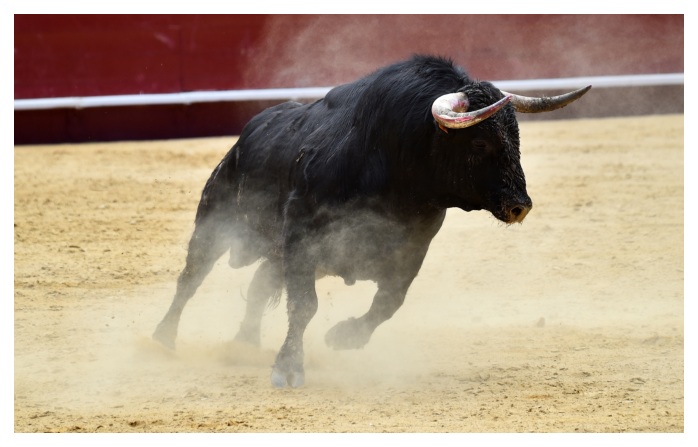

In [3]:
# import and display image

# select image: 

# mime
#img = plt.imread('AIArt/mime.jpg')

# charging bull
img = plt.imread('AIArt/toro.jpg')

# spitting bull
#img = plt.imread('AIArt/toro2.jpg')


# display image
plt.imshow(img)
plt.axis('off');

In [4]:
# shape of image/pixels

img.shape

(1200, 1920, 3)

In [5]:
# reshape image into pixel per row and columns for color

# reshaping image
img_flat = img.reshape(img.shape[0]*img.shape[1],3)

# number of rows
img_flat.shape

(2304000, 3)

In [6]:
# running K-Means with 

kmeans = KMeans(n_clusters=6, random_state=0).fit(img_flat)

In [7]:
# replace row with its closest cluster

# copy of reshaped image data
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

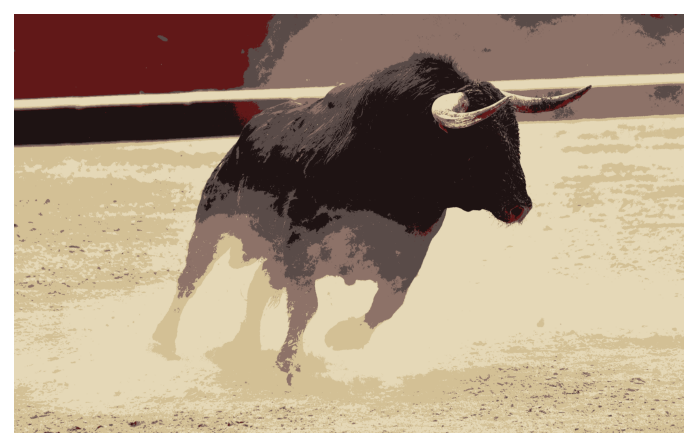

In [8]:
# reshape and display image

img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [9]:
# function

# (1) recieves image and number of clusters (k)
# (2) returns image reduced to k colors and inertia

def image_cluster(img, k):
    
    # reshaping image into pixel per row and columns for color
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    
    # k means for k number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    
    # creating a copy of the flat image
    img_flat2 = img_flat.copy()

    # loop thru pixels and reassign color to corresponding cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
    
    # reshaping compressed image to original shape
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [ ]:
# for images between 10 to 30 skipping intervals of 5 fit K-Means and draw inertia curve to 
# optimize for numbers of clusters

# list of k range to train over
k_vals = list(range(10,31,5))

# initiating empty lists 
img_list = []
inertia = []

for k in k_vals:
#    print(k)

    # run function
    img2, ine = image_cluster(img,k)
    
    # append data to list
    img_list.append(img2)
    
    # append inertia to list
    inertia.append(ine)  

In [ ]:
# Plot to optimize number of clusters

# number of clusters vs inertia
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

In [ ]:
# plot photos in a grid for different k values

plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');